In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
pd.set_option('display.float_format', lambda x: '%.3f' % x)
plt.rcParams["figure.figsize"] = (10,6)

In [16]:
df_0 = pd.read_csv("./dataset/KDDTrain+_20Percent.csv")
df= df_0.copy()
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,level
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.170,0.030,0.170,0.000,0.000,0.000,0.050,0.000,normal,20
1,0,udp,other,SF,146,0,0,0,0,0,...,0.000,0.600,0.880,0.000,0.000,0.000,0.000,0.000,normal,15
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.100,0.050,0.000,0.000,1.000,1.000,0.000,0.000,neptune,19
3,0,tcp,http,SF,232,8153,0,0,0,0,...,1.000,0.000,0.030,0.040,0.030,0.010,0.000,0.010,normal,21
4,0,tcp,http,SF,199,420,0,0,0,0,...,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,normal,21


In [17]:
columns = (['duration'
,'protocol_type'
,'service'
,'flag'
,'src_bytes'
,'dst_bytes'
,'land'
,'wrong_fragment'
,'urgent'
,'hot'
,'num_failed_logins'
,'logged_in'
,'num_compromised'
,'root_shell'
,'su_attempted'
,'num_root'
,'num_file_creations'
,'num_shells'
,'num_access_files'
,'num_outbound_cmds'
,'is_host_login'
,'is_guest_login'
,'count'
,'srv_count'
,'serror_rate'
,'srv_serror_rate'
,'rerror_rate'
,'srv_rerror_rate'
,'same_srv_rate'
,'diff_srv_rate'
,'srv_diff_host_rate'
,'dst_host_count'
,'dst_host_srv_count'
,'dst_host_same_srv_rate'
,'dst_host_diff_srv_rate'
,'dst_host_same_src_port_rate'
,'dst_host_srv_diff_host_rate'
,'dst_host_serror_rate'
,'dst_host_srv_serror_rate'
,'dst_host_rerror_rate'
,'dst_host_srv_rerror_rate'
,'attack'
,'level'])

df.columns = columns

In [18]:
df.head(5)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,level
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.170,0.030,0.170,0.000,0.000,0.000,0.050,0.000,normal,20
1,0,udp,other,SF,146,0,0,0,0,0,...,0.000,0.600,0.880,0.000,0.000,0.000,0.000,0.000,normal,15
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.100,0.050,0.000,0.000,1.000,1.000,0.000,0.000,neptune,19
3,0,tcp,http,SF,232,8153,0,0,0,0,...,1.000,0.000,0.030,0.040,0.030,0.010,0.000,0.010,normal,21
4,0,tcp,http,SF,199,420,0,0,0,0,...,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,normal,21


In [19]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
duration,25192.000,305.054,2686.556,0.000,0.000,0.000,0.000,42862.000
src_bytes,25192.000,24330.628,2410805.402,0.000,0.000,44.000,279.000,381709090.000
dst_bytes,25192.000,3491.847,88830.718,0.000,0.000,0.000,530.250,5151385.000
land,25192.000,0.000,0.009,0.000,0.000,0.000,0.000,1.000
wrong_fragment,25192.000,0.024,0.260,0.000,0.000,0.000,0.000,3.000
urgent,25192.000,0.000,0.006,0.000,0.000,0.000,0.000,1.000
hot,25192.000,0.198,2.154,0.000,0.000,0.000,0.000,77.000
num_failed_logins,25192.000,0.001,0.045,0.000,0.000,0.000,0.000,4.000
logged_in,25192.000,0.395,0.489,0.000,0.000,0.000,1.000,1.000
num_compromised,25192.000,0.228,10.417,0.000,0.000,0.000,0.000,884.000


In [20]:
df.shape

(25192, 43)

In [22]:
attack_n = []
for i in df.attack :
  if i == 'normal':
    attack_n.append("normal")
  else:
    attack_n.append("attack")
df['attack'] = attack_n 

In [23]:
df['attack'].unique()

array(['normal', 'attack'], dtype=object)

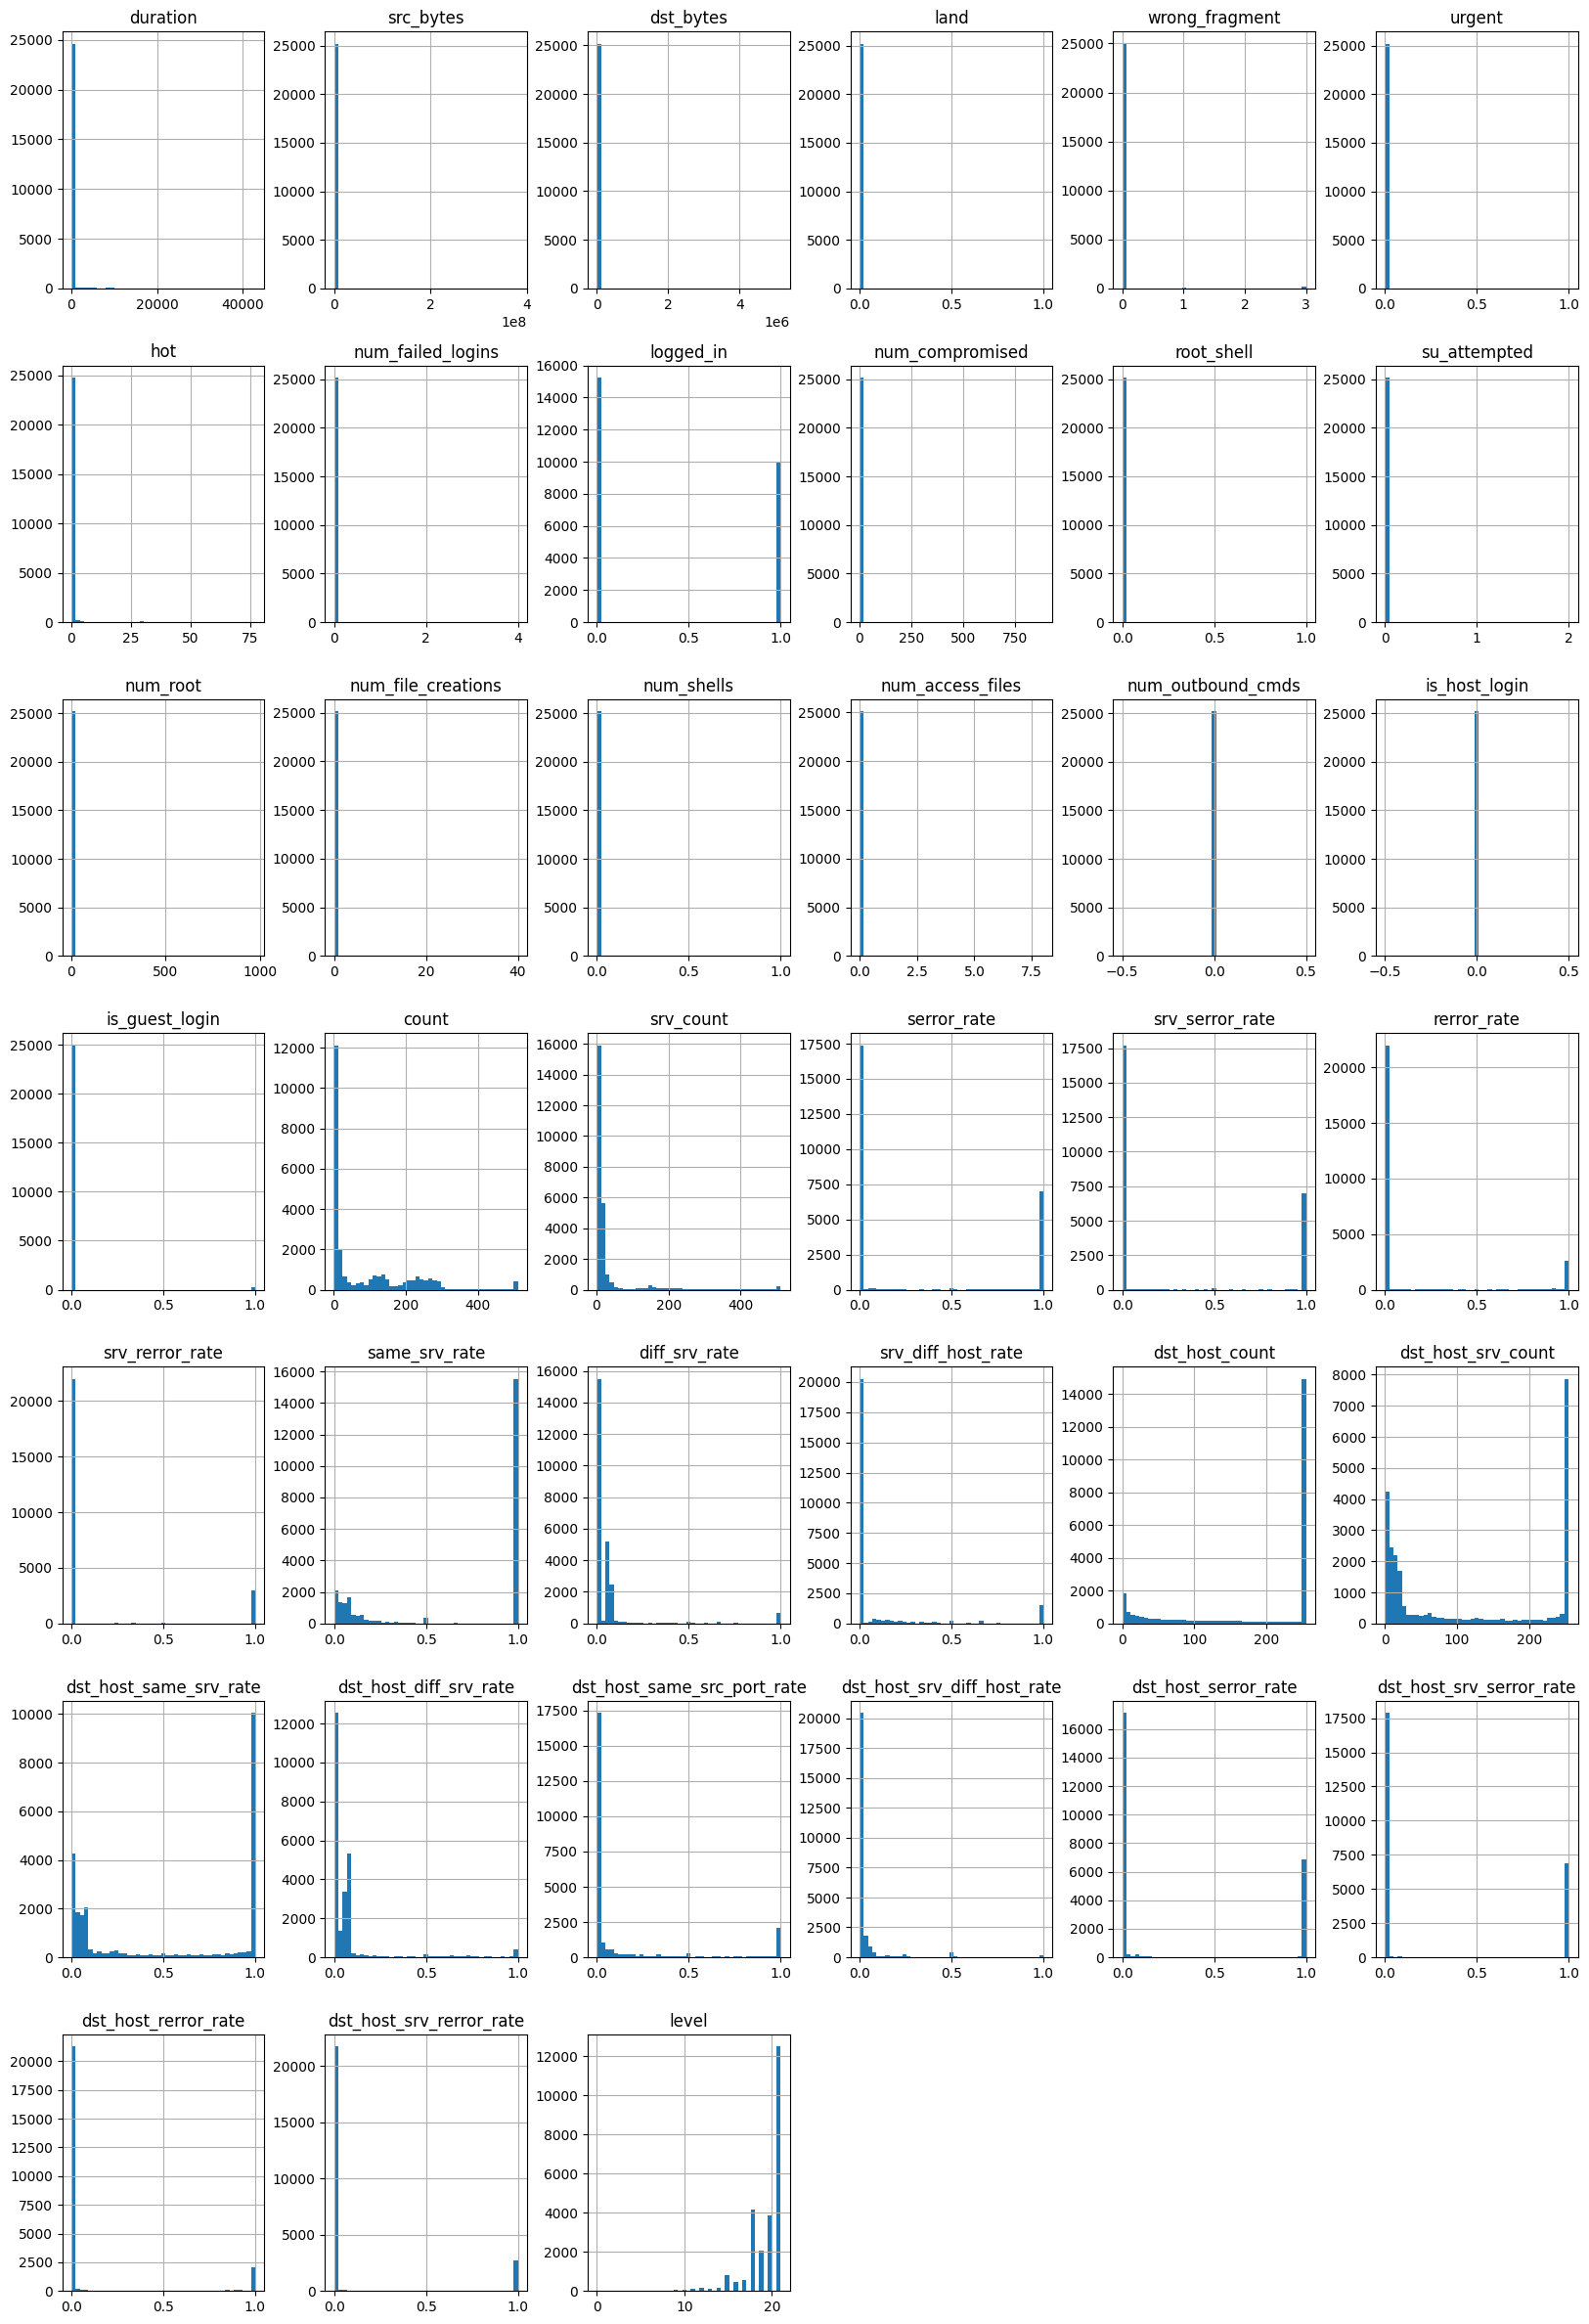

In [24]:
df.hist(bins=43,figsize=(20,30));

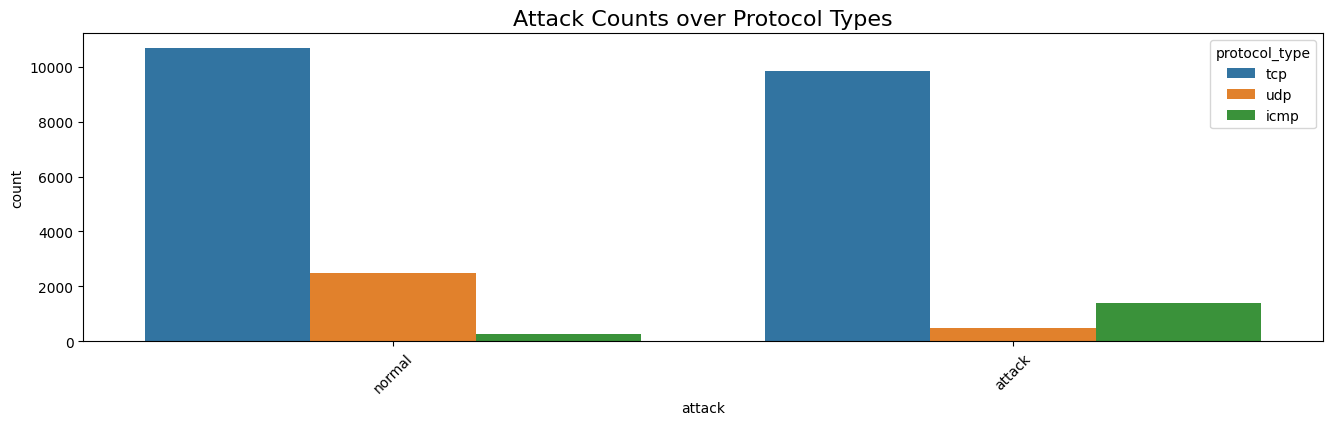

In [25]:
plt.figure(figsize=(16,4))
sns.countplot(x='attack',data=df,hue='protocol_type')
plt.xticks(rotation=45)
plt.title('Attack Counts over Protocol Types',fontdict={'fontsize':16})
plt.show()

In [38]:
df.describe()


,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,level
count,25192.000,25192.000,25192.000,25192.000,25192.000,25192.000,25192.000,25192.000,25192.000,25192.000,...,25192.000,25192.000,25192.000,25192.000,25192.000,25192.000,25192.000,25192.000,25192.000,25192.000
mean,305.054,24330.628,3491.847,0.000,0.024,0.000,0.198,0.001,0.395,0.228,...,115.063,0.520,0.083,0.147,0.032,0.286,0.280,0.118,0.119,19.488
std,2686.556,2410805.402,88830.718,0.009,0.260,0.006,2.154,0.045,0.489,10.417,...,110.647,0.449,0.187,0.308,0.111,0.445,0.446,0.306,0.317,2.329
min,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,10.000,0.050,0.000,0.000,0.000,0.000,0.000,0.000,0.000,18.000
50%,0.000,44.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,61.000,0.510,0.030,0.000,0.000,0.000,0.000,0.000,0.000,20.000
75%,0.000,279.000,530.250,0.000,0.000,0.000,0.000,0.000,1.000,0.000,...,255.000,1.000,0.070,0.060,0.020,1.000,1.000,0.000,0.000,21.000
max,42862.000,381709090.000,5151385.000,1.000,3.000,1.000,77.000,4.000,1.000,884.000,...,255.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,21.000


In [48]:
df = df.drop(columns=['service', 'flag', 'attack'])

In [54]:
df = df.drop(columns=['num_outbound_cmds', 'is_host_login'])
df.corr()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,level
duration,1.000,0.085,0.013,-0.001,-0.010,-0.000,0.004,0.011,-0.064,0.095,...,-0.113,-0.119,0.263,0.241,-0.025,-0.067,-0.066,0.187,0.208,-0.155
src_bytes,0.085,1.000,0.004,-0.000,-0.001,-0.000,0.001,-0.000,-0.002,-0.000,...,-0.009,-0.007,0.001,0.002,-0.001,-0.006,-0.006,-0.002,0.006,-0.033
dst_bytes,0.013,0.004,1.000,-0.000,-0.004,0.000,0.003,0.005,0.013,0.036,...,-0.001,0.022,-0.013,0.024,-0.006,-0.016,-0.015,-0.014,-0.013,-0.064
land,-0.001,-0.000,-0.000,1.000,-0.001,-0.000,-0.001,-0.000,-0.007,-0.000,...,-0.009,0.010,-0.004,0.025,0.053,0.014,0.006,-0.003,-0.003,-0.046
wrong_fragment,-0.010,-0.001,-0.004,-0.001,1.000,-0.001,-0.008,-0.002,-0.074,-0.002,...,-0.047,-0.052,0.053,0.035,-0.020,-0.054,-0.057,0.028,-0.034,-0.163
urgent,-0.000,-0.000,0.000,-0.000,-0.001,1.000,0.002,-0.000,0.008,0.003,...,-0.006,-0.007,-0.002,-0.003,-0.002,-0.004,-0.004,-0.002,-0.002,-0.050
hot,0.004,0.001,0.003,-0.001,-0.008,0.002,1.000,0.005,0.113,0.002,...,-0.048,-0.033,-0.008,-0.031,-0.021,-0.056,-0.056,-0.028,-0.030,-0.151
num_failed_logins,0.011,-0.000,0.005,-0.000,-0.002,-0.000,0.005,1.000,-0.007,0.016,...,-0.022,-0.003,0.000,-0.009,-0.008,-0.010,-0.010,0.017,0.019,-0.078
logged_in,-0.064,-0.002,0.013,-0.007,-0.074,0.008,0.113,-0.007,1.000,0.027,...,0.625,0.607,-0.256,-0.159,-0.057,-0.490,-0.492,-0.274,-0.271,0.267
num_compromised,0.095,-0.000,0.036,-0.000,-0.002,0.003,0.002,0.016,0.027,1.000,...,-0.018,-0.012,0.002,-0.004,0.014,-0.008,-0.008,-0.007,-0.004,-0.014


<Axes: >

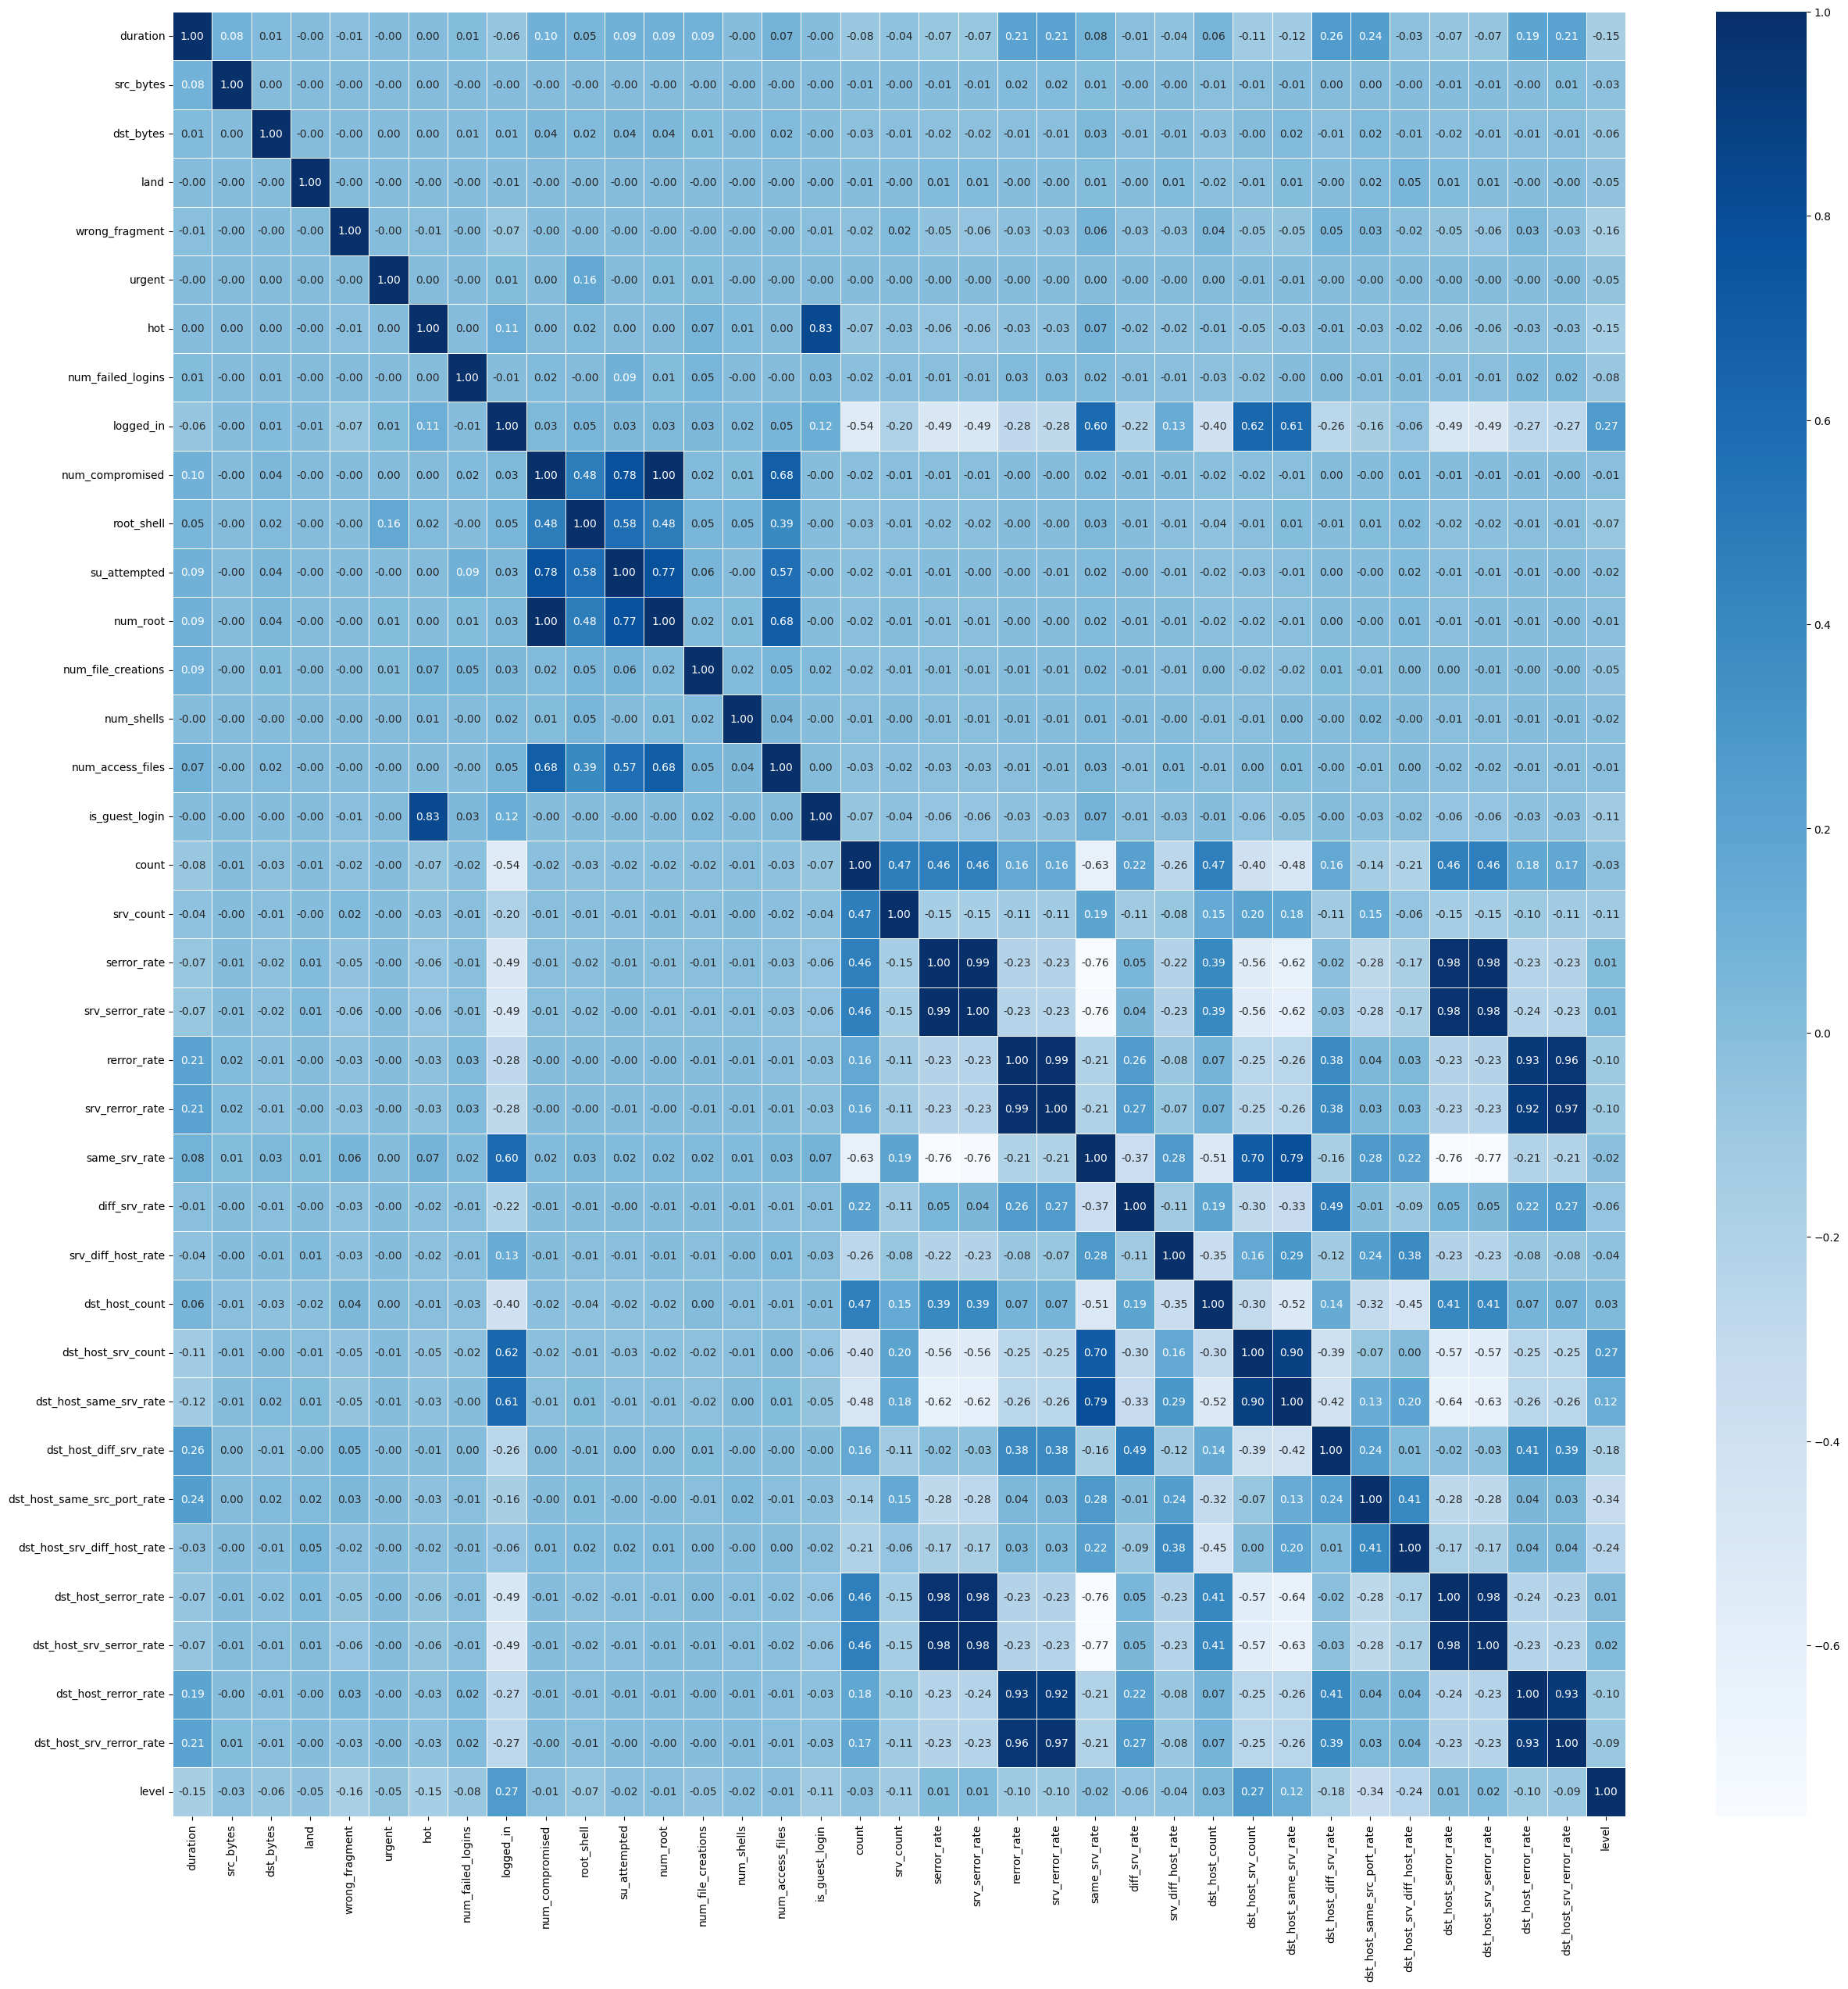

In [55]:
plt.figure(figsize=(30,30))
sns.heatmap(data = df.corr(), annot=True, 
fmt = '.2f', linewidths=.5, cmap='Blues')

In [56]:
cor_matrix = df.corr()
cor_matrix.to_csv('correlation_matrix.csv')